Import used packages

In [60]:
import cv2
import os
import numpy as np
from algorithms import *
from IPython.display import Image

Define image path

In [61]:
image_path = './assets/low2.jpg'
file_extension = os.path.splitext(image_path)[1]
image_type = file_extension[1:].lower()

Load RGB image

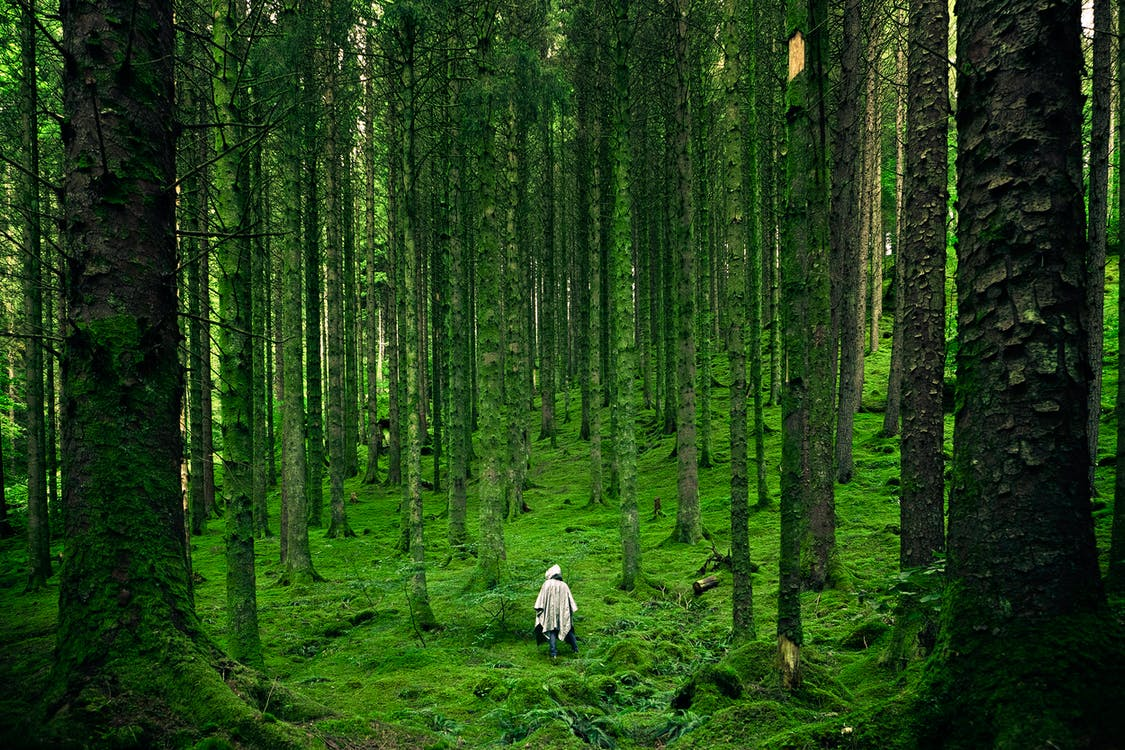

In [62]:
# Load the image in color format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
Image(filename=image_path)

Change image to matrix

In [63]:
matrix = np.float32(img)

# Print the matrix shape
print("Matrix shape:", matrix.shape)

Matrix shape: (750, 1125, 3)


In [64]:
original_size, _ = save_image(matrix, image_type, onlySize=True)

Image size: 0.2473 mb


Split the image into three separate color channels

In [65]:
# Slice the third dimension of the array

b = matrix[:,:,0]
g = matrix[:,:,1]
r = matrix[:,:,2]

Apply SVD to each channel

In [66]:
U_b, S_b, Vt_b = svd(b)
U_g, S_g, Vt_g = svd(g)
U_r, S_r, Vt_r = svd(r)

Find the Number of singular Values

In [67]:
num_sv = 112

Trunctate the matrices U, S, V

In [68]:
U_b_truncate, S_b_truncate, Vt_b_truncate = truncate(U_b, S_b, Vt_b, num_sv)
U_g_truncate, S_g_truncate, Vt_g_truncate = truncate(U_g, S_g, Vt_g, num_sv)
U_r_truncate, S_r_truncate, Vt_r_truncate = truncate(U_r, S_r, Vt_r, num_sv)

Compress Channels

In [69]:
b_compressed = compress(U_b_truncate, S_b_truncate, Vt_b_truncate)
g_compressed = compress(U_g_truncate, S_g_truncate, Vt_g_truncate)
r_compressed = compress(U_r_truncate, S_r_truncate, Vt_r_truncate)


Merge Channels

In [70]:
compressed_array = [b_compressed, g_compressed, r_compressed]

merged = cv2.merge(compressed_array)

Save merged matrix as an Image

Image saved in path:  compressed-images/1676659506.jpg
Image size: 0.2038 mb


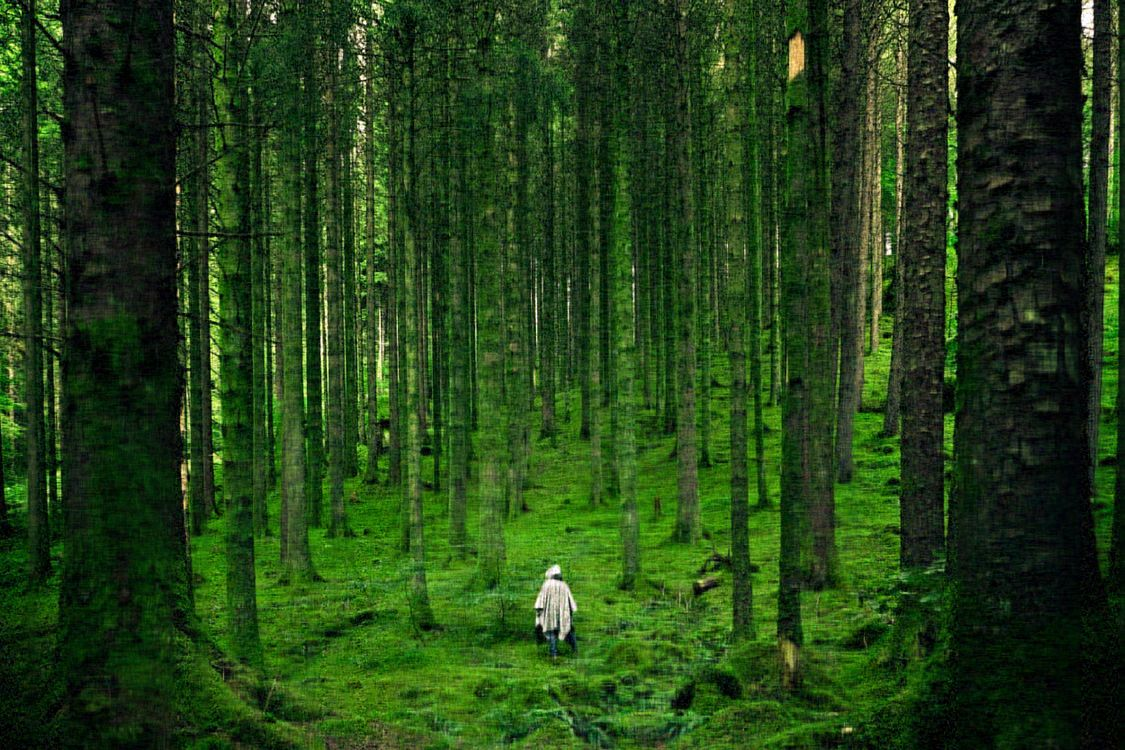

In [71]:
compressed_size, path = save_image(merged, image_type, onlySize=False)
Image(filename=path)